# Big-Mart Sales Prediction

In [69]:
#Import modules

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## train data

In [71]:
df_train=pd.read_csv("C:/Users/USER/Downloads/train_v9rqX0R.csv")

In [72]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [73]:
#drop unnecessary columns

In [74]:
df_train.drop(df_train[['Item_Identifier','Outlet_Identifier']],axis=1,inplace=True)

In [75]:
# does any missing values are there?

In [76]:
df_train.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [77]:
df_train.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

<AxesSubplot:>

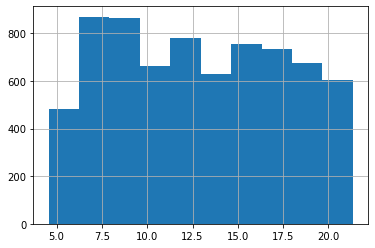

In [78]:
df_train["Item_Weight"].hist()

In [79]:
#we have na values in outlet size and item weight.Since outlet sales is object,replace na with mode.Since item weight is float and is skewed replace it with median

In [80]:
df_train["Outlet_Size"].fillna(df_train["Outlet_Size"].mode()[0],inplace=True)
df_train["Item_Weight"].fillna(df_train["Item_Weight"].median,inplace=True)


In [81]:
df_train.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [82]:
#delete duplicate values

In [83]:
df_train["Item_Fat_Content"]=df_train["Item_Fat_Content"].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [84]:
df_train[['Item_Weight','Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Establishment_Year','Outlet_Type']]=df_train[['Item_Weight','Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Establishment_Year','Outlet_Type']].astype(str)

In [85]:
df_train[['Item_Weight','Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Establishment_Year','Outlet_Type']]

,Item_Weight,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Establishment_Year,Outlet_Type
0,9.3,Low Fat,Dairy,Medium,Tier 1,1999,Supermarket Type1
1,5.92,Regular,Soft Drinks,Medium,Tier 3,2009,Supermarket Type2
2,17.5,Low Fat,Meat,Medium,Tier 1,1999,Supermarket Type1
3,19.2,Regular,Fruits and Vegetables,Medium,Tier 3,1998,Grocery Store
4,8.93,Low Fat,Household,High,Tier 3,1987,Supermarket Type1
...,...,...,...,...,...,...,...
8518,6.865,Low Fat,Snack Foods,High,Tier 3,1987,Supermarket Type1
8519,8.38,Regular,Baking Goods,Medium,Tier 2,2002,Supermarket Type1
8520,10.6,Low Fat,Health and Hygiene,Small,Tier 2,2004,Supermarket Type1
8521,7.21,Regular,Snack Foods,Medium,Tier 3,2009,Supermarket Type2


In [86]:
#Encode categorical values 

In [87]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_train[['Item_Weight','Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Establishment_Year','Outlet_Type']]=df_train[['Item_Weight','Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Establishment_Year','Outlet_Type']].apply(le.fit_transform)

In [88]:
df_train.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,186.669835,0.352693,0.066132,7.226681,140.992782,3.790684,1.170832,1.112871,1.201220,2181.288914
std,154.325152,0.477836,0.051598,4.209990,62.275067,2.730322,0.600327,0.812757,0.796459,1706.499616
min,0.000000,0.000000,0.000000,0.000000,31.290000,0.000000,0.000000,0.000000,0.000000,33.290000
25%,56.000000,0.000000,0.026989,4.000000,93.826500,1.000000,1.000000,0.000000,1.000000,834.247400
50%,109.000000,0.000000,0.053931,6.000000,143.012800,4.000000,1.000000,1.000000,1.000000,1794.331000
75%,368.000000,1.000000,0.094585,10.000000,185.643700,6.000000,2.000000,2.000000,1.000000,3101.296400
max,415.000000,1.000000,0.328391,15.000000,266.888400,8.000000,2.000000,2.000000,3.000000,13086.964800


In [89]:
# i think most of the values were categorical so there isnt a need for scaling

In [90]:
X=df_train.drop('Item_Outlet_Sales',axis=1)
X
y=df_train['Item_Outlet_Sales']
y


0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=46,test_size=0.2)

In [92]:
#lets fit the data using Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [93]:
#Now,let us predict
y_pred_lr=lr.predict(X_test)
y_pred_lr


array([3642.18512602, 1795.1898328 , 1360.82293448, ...,  618.72022065,
       3818.66280056, 3832.15197419])

In [94]:
from sklearn.metrics import mean_squared_error, r2_score
rsqr_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test,y_pred_lr)
print("The R-Sqaure value for linear regression model for predicting sales is",rsqr_lr)


The R-Sqaure value for linear regression model for predicting sales is 0.5007986274917995


In [95]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train,y_train)
y_pred_ls=lasso.predict(X_test)
y_pred_ls
rsqr_lasso = r2_score(y_test, y_pred_ls)
print("The R-Sqaure value for lasso regression model for predicting sales price is",rsqr_lasso)


The R-Sqaure value for lasso regression model for predicting sales price is 0.5004465833473795


In [96]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
rsqr_rf=r2_score(y_test, y_pred_rf)
print("The R-Sqaure value for random forest model for predicting sales price is",rsqr_rf)


The R-Sqaure value for random forest model for predicting sales price is 0.5132191660823696


In [97]:
#test data

In [98]:
df=pd.read_csv("C:/Users/USER/Downloads/test_AbJTz2l.csv")


In [99]:
df.drop(df[['Item_Identifier','Outlet_Identifier']],axis=1,inplace=True)

In [100]:
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
df[['Item_Weight','Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']]=df[['Item_Weight','Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']].astype(str)


In [101]:
df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0],inplace=True)
df["Item_Weight"].fillna(df["Item_Weight"].median,inplace=True)

In [102]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[['Item_Weight','Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Establishment_Year','Outlet_Location_Type','Outlet_Type']]=df[['Item_Weight','Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Establishment_Year','Outlet_Location_Type','Outlet_Type']].apply(le.fit_transform)

In [103]:
# using linear regression

In [104]:
y_actual_lr=lr.predict(df)
y_actual_lr

array([2065.31772815,  562.12462874, 1671.00289778, ..., 1238.3754851 ,
       2806.11062803,  345.9206459 ])

In [105]:
#using Lasso regression

In [106]:
y_actual_ls=lasso.predict(df)
y_actual_ls

array([2042.01465217,  551.96816889, 1693.64403814, ..., 1252.72326397,
       2785.38421242,  359.53181416])

In [107]:
#using random forest

In [108]:
y_actual_rf=rf.predict(df)
y_actual_rf

array([1795.9955  , 1257.19685 ,  788.67339 , ..., 1730.107932,
       4326.308478, 1734.029494])

In [109]:
df["Item_Outlet_Sales"]=y_actual_rf

In [110]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,115,0,0.007565,13,107.8622,4,1,0,1,1795.995500
1,345,1,0.038428,4,87.3198,7,3,1,1,1257.196850
2,49,0,0.099575,11,241.7538,3,3,2,0,788.673390
3,278,0,0.015388,13,155.0340,7,3,1,1,2839.763502
4,410,1,0.118599,4,234.2300,0,1,2,3,4879.468434
...,...,...,...,...,...,...,...,...,...,...
5676,5,1,0.013496,13,141.3154,2,2,0,1,2432.660092
5677,300,1,0.142991,15,169.1448,8,1,2,2,3042.739290
5678,0,0,0.073529,8,118.7440,5,3,1,1,1730.107932
5679,60,1,0.000000,3,214.6218,7,3,1,1,4326.308478


In [111]:
df["Item_Outlet_Sales"].describe()

count    5681.000000
mean     2124.209618
std      1276.735042
min        52.172088
25%      1059.440934
50%      2050.810476
75%      3036.747090
max      6923.281352
Name: Item_Outlet_Sales, dtype: float64